In [240]:
%run dataset.py
%run dataext.py

In [245]:
import sklearn
%matplotlib notebook

In [243]:
# curve fit

import numpy as np
from scipy.optimize import leastsq

p0 = [0, 0, 0, 1]

def fitfunc(p, coords):
    x0, y0, z0, R = p
    x, y, z = coords.T
    return np.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)

errfunc = lambda p, x: fitfunc(p, x) - p[3]

coordinates = []
keys = []

for i in range(len(pieces)):
    coords = pd.DataFrame.as_matrix(getlhrh(pieces[i])['rh'])
    p1, flag = leastsq(errfunc, p0, args=(coords,))
    coordinates.append(p1)
    keys.append(int(i))

<IPython.core.display.Javascript object>


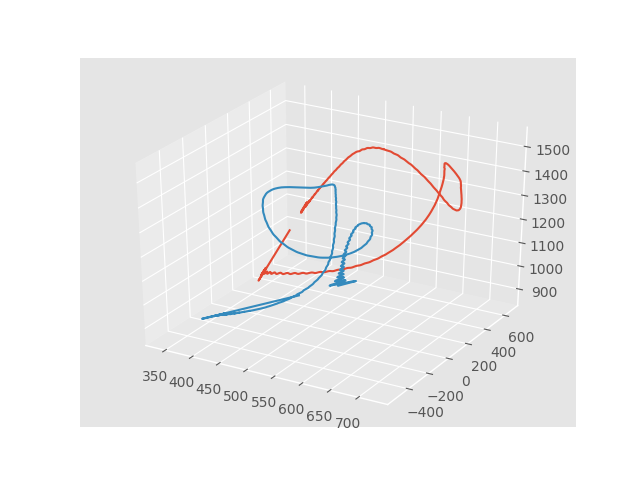

In [246]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


stri = '1_1_4'

x = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,0]
y = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,1]
z = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,2]

x1 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,0]
y2 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,1]
z3 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)
ax.plot(x1,y2,z3)

In [379]:
'''learning features - bspline coeffs, vels, peaks, handdistav, qomav, zav'''

from numpy import arange, cos, linspace, pi, sin, random
from scipy.interpolate import splprep, splev

# make ascending spiral in 3-space
# t=linspace(0,1.75*2*pi,100)
key,handstrat,participant,melody,sex,age,score,genre,proc,knot_vectors,bspline_coeffs = ([] for i in range(11))
cols=['key','handstrat','participant','melody','sex','age','score','genre','proc','knot_vectors','bspline_coeffs']


for i in range(len(tracings)):
    coords = pd.DataFrame.as_matrix(getlhrh(tracings[i])['rh'])
    x = coords[:,0]
    y = coords[:,1]
    z = coords[:,2]
    tckp,u = splprep([x,y,z],s=1.0,k=2,nest=10)
#     xnew,ynew,znew = splev(linspace(0,1,600),tckp)
    key.append(int(i))
    handstrat.append(int(returnDetails(tracings[i])['typeID']))
    partic = int(returnDetails(tracings[i])['partID'])
    participant.append(partic)
    melID = int(returnDetails(tracings[i])['melID'])
    melody.append(melID)
    sex.append(list(participants.loc[participants.index[partic],['sex']])[0])
    age.append(int(participants.loc[participants.index[partic],['age']]))
    score.append(int(participants.loc[participants.index[partic],['scoreMus']]))
    if int(melID) in im:
        genre.append('im')
    elif int(melID) in jo:
        genre.append('jo')
    elif int(melID) in sc:
        genre.append('sc')
    elif int(melID) in vo:
        genre.append('vo')
    if int(melID) <=16:
        proc.append('norm')
    elif int(melID) >=16:
        proc.append('syn')
    knot_vectors.append(tckp[0])
    bspline_coeffs.append(tckp[1])



In [400]:
# for i in range(len(key)):
#     splinedataset = pd.DataFrame(zip(key,handstrat,participant,melody,sex,age,score,genre,proc,knot_vectors,bspline_coeffs))
#     splinedataset.columns=cols
# splinedataset['melcat'] = pd.read_excel('avdataset.xls')[['melcat']]
bsplines1 = []
bsplines2 = []
bsplines3 = []
knots = pd.DataFrame(knot_vectors)
for i in range(len(bspline_coeffs)):
    bsplines1.append(bspline_coeffs[i][0])
    bsplines2.append(bspline_coeffs[i][1])
    bsplines3.append(bspline_coeffs[i][2])
    
bsplines = pd.concat([pd.DataFrame(bsplines1),pd.DataFrame(bsplines2),pd.DataFrame(bsplines3)],axis = 1)
features = pd.concat([knots,bsplines],axis=1)
features['melcat'] = pd.read_excel('avdataset.xls')[['melcat']]
features['qomav'] = pd.read_excel('avdataset.xls')[['qomav']]
features['zmax'] = pd.read_excel('avdataset.xls')[['zmax']]
features['zmin'] = pd.read_excel('avdataset.xls')[['zmin']]
features['handdistav'] = pd.read_excel('avdataset.xls')[['handdistav']]

In [421]:
test_labels = pd.DataFrame.as_matrix(splinedataset['melcat'].iloc[300:])
test_labels

TypeError: unbound method as_matrix() must be called with DataFrame instance as first argument (got Series instance instead)

In [403]:
training_features = features.iloc[:300]
training_labels = splinedataset['melcat'].iloc[:300]
test_features = features.iloc[300:]
test_labels = splinedataset['melcat'].iloc[300:]

In [404]:
from sklearn.neighbors import KNeighborsClassifier
# model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
sklearn.__path__
model = KNeighborsClassifier(n_neighbors=2)
model.fit(training_features,training_labels)
predicted_labels = model.predict(test_features)
print(predicted_labels,test_labels)

(array([ 2,  4, 11,  5,  2,  2, 12,  1,  3,  9,  5,  8,  5,  4,  7,  2,  2,
        9,  1,  4]), 300     1
301     5
302     5
303     3
304    12
305     2
306     7
307     7
308    11
309     3
310    13
311     9
312     8
313     8
314     9
315     9
316    16
317    13
318    15
319     3
Name: melcat, dtype: int64)


In [407]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

features.shape, test_features.shape

((320, 36), (20, 36))

<IPython.core.display.Javascript object>


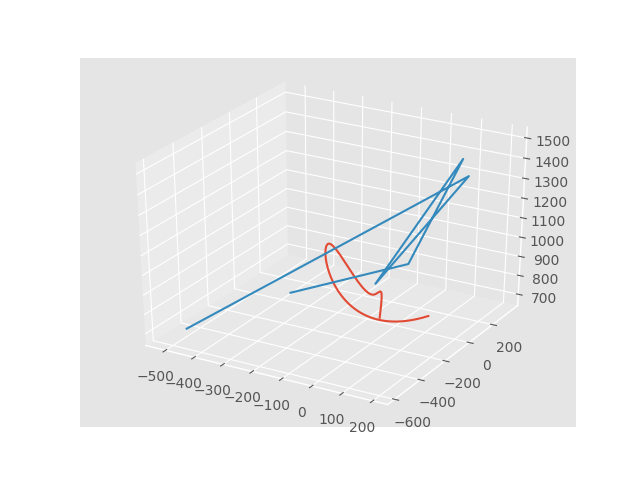

In [377]:
# fig,ax = plt.subplots()
# plt.plot(tckp)
# plt.plot(u)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xnew,ynew,znew)
# ax.plot(x,y,z)
ax.plot(tckp[1][0],tckp[1][1],tckp[1][2])

In [57]:
import pylab
pylab.subplot(2,2,1)
data,=pylab.plot(x,y,'bo-',label='data')
fit,=pylab.plot(xnew,ynew,'r-',label='fit')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('y')

pylab.subplot(2,2,2)
data,=pylab.plot(x,z,'bo-',label='data')
fit,=pylab.plot(xnew,znew,'r-',label='fit')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('z')

pylab.subplot(2,2,3)
data,=pylab.plot(y,z,'bo-',label='data')
fit,=pylab.plot(ynew,znew,'r-',label='fit')
pylab.legend()
pylab.xlabel('y')
pylab.ylabel('z')

pylab.savefig('splprep_demo.png')